**Bài tập 2:** Cài đặt và thực thi thuật toán KNN cho tập dữ liệu penguins.csv với K là 5 và p = 2. Hiển thị Confusion Matrix, trực quan hóa dữ liệu test, train và in ra các chỉ số đánh giá mô hình.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
penguins = pd.read_csv('/content/drive/MyDrive/NLMH_OnkiemTra/Chap2_Classification_K-NearestNeighbors/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Tiền xử lý dữ liệu**

Bạn cần xác định xem cột nào sẽ được sử dụng làm đặc trưng và cột nào sẽ là nhãn mục tiêu.

Giả sử chúng ta sử dụng tất cả các cột số và mục tiêu của chúng ta là một cột hạng mục, chúng ta có thể làm như sau:

In [4]:
features = penguins.select_dtypes(include=[np.number])
target = penguins['species']  # replace 'species' with your actual target column

# Convert target to numerical
le = LabelEncoder()
target = le.fit_transform(target)

In [5]:
# Fill NaN values with mean of the respective column
features = features.fillna(features.mean())
features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
K = 5
p = 2
classifier = KNeighborsClassifier(n_neighbors=K, p=p)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Dự đoán và đánh giá**

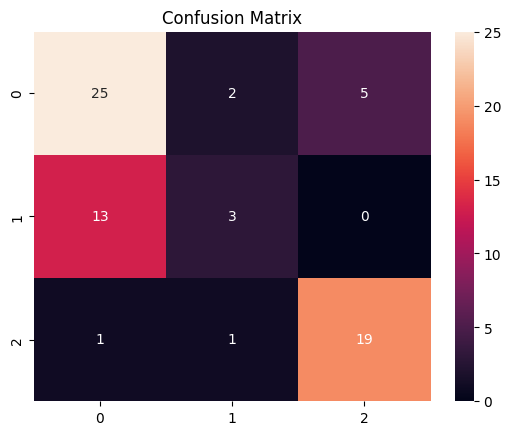

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        32
           1       0.50      0.19      0.27        16
           2       0.79      0.90      0.84        21

    accuracy                           0.68        69
   macro avg       0.64      0.62      0.61        69
weighted avg       0.65      0.68      0.65        69



In [8]:
# Dự đoán và đánh giá
y_pred = classifier.predict(X_test)

# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:\n', cm)

# Hiển thị confusion matrix bằng seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# # Trực quan hóa dữ liệu train và test
# plt.scatter(X_train[:, 0], X_train[:, 1], color='red', label='Train data')
# plt.scatter(X_test[:, 0], X_test[:, 1], color='blue', label='Test data')
# plt.legend()
# plt.show()

In [13]:
np.isnan(X_train).any()
np.isnan(y_train).any()

False

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to visualize the results
def visualize_results(X_set, y_set, set_description):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('K-NN (%s set)' % set_description)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualize the Training set results
visualize_results(X_train, y_train, 'Training')

# Visualize the Test set results
visualize_results(X_test, y_test, 'Test')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored